Метрики SMOTE
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1-score: 1.0
Test Accuracy: 0.971
Test Precision: 0.981
Test Recall: 0.972
Test F1-score: 0.977


C:\Users\cfifz\AppData\Local\Temp\ipykernel_8320\603027752.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap=plt.cm.get_cmap("Set1", 2), alpha=0.7)


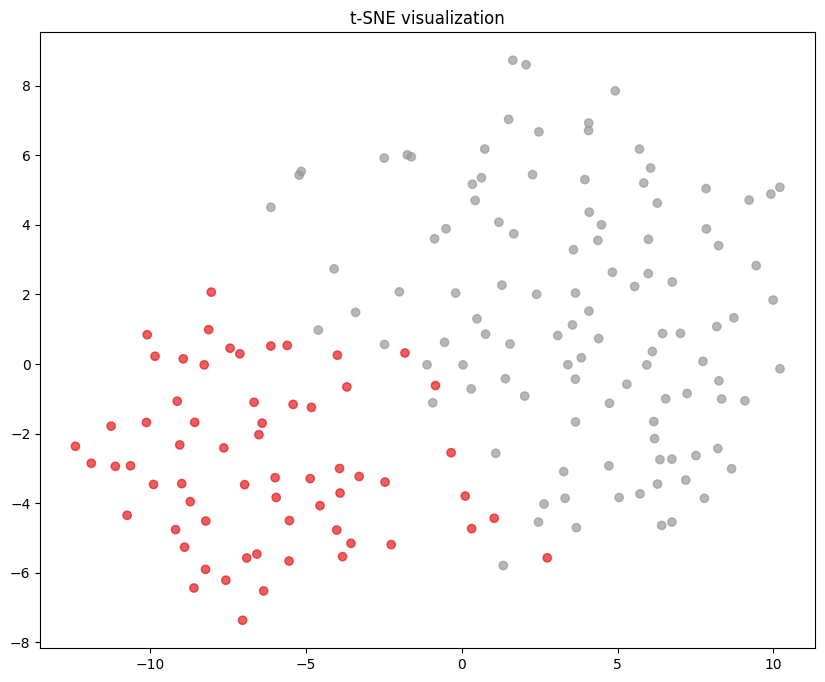

C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\cfifz\AppData\Local\Temp\ipykernel_8320\603027752.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_test, cmap=plt.cm.get_cmap("Set1", 2), alpha=0.7)


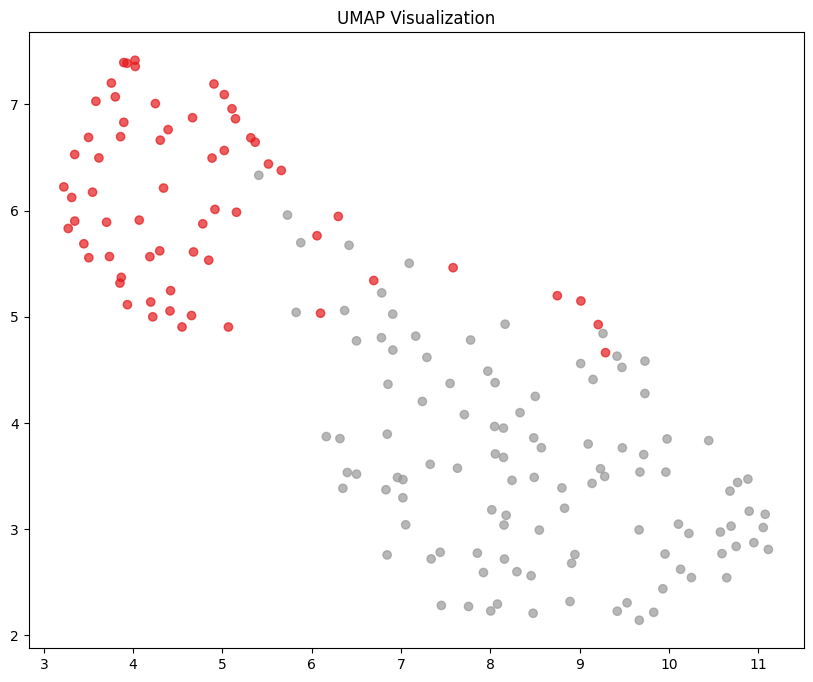

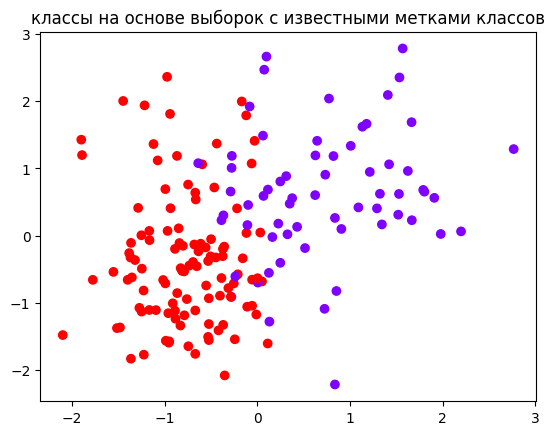

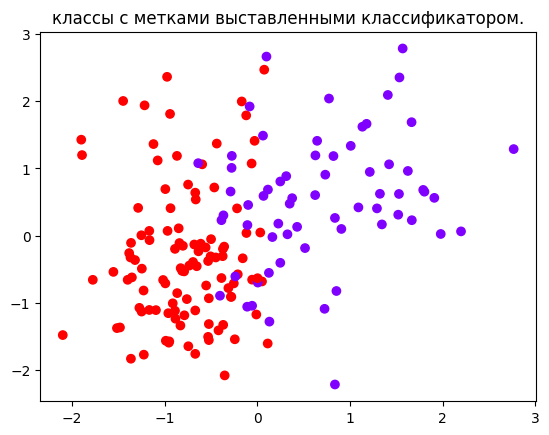

R2: 0.87


In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sm = SMOTE(sampling_strategy='auto',random_state=42,k_neighbors=5)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test_sm = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sm, y_train_sm)

y_train_pred = model.predict(X_train_sm)
accuracy_train = accuracy_score(y_train_sm, y_train_pred)
precision_train = precision_score(y_train_sm, y_train_pred)
recall_train = recall_score(y_train_sm, y_train_pred)
f1_train = f1_score(y_train_sm, y_train_pred)

y_test_pred = model.predict(X_test_sm)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print('Метрики SMOTE')
print('Train Accuracy:', np.round(accuracy_train,3))
print('Train Precision:', np.round(precision_train,3))
print('Train Recall:', np.round(recall_train,3))
print('Train F1-score:', np.round(f1_train,3))

print('Test Accuracy:', np.round(accuracy_test,3))
print('Test Precision:', np.round(precision_test,3))
print('Test Recall:', np.round(recall_test,3))
print('Test F1-score:', np.round(f1_test,3))

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_test_sm)
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap=plt.cm.get_cmap("Set1", 2), alpha=0.7)
plt.title('t-SNE visualization')
plt.show()


umap_ = umap.UMAP(random_state=42)
X_umap = umap_.fit_transform(X_test_sm)
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_test, cmap=plt.cm.get_cmap("Set1", 2), alpha=0.7)
plt.title('UMAP Visualization')
plt.show()

plt.scatter(X_test_sm[:, 0], X_test_sm[:, 1], c=y_test, cmap='rainbow')
plt.title('классы на основе выборок с известными метками классов')
plt.show()

y_pred = model.predict(X_test_sm)
plt.scatter(X_test_sm[:, 0], X_test_sm[:, 1], c=y_pred, cmap='rainbow')
plt.title('классы с метками выставленными классификатором.')
plt.show()

print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

